## **Introduction**

Les prix des billets d'avion peuvent être difficiles à deviner. Aujourd'hui, nous pouvons voir un prix, mais demain, le prix du même vol sera différent. Nous avons souvent entendu des voyageurs dire que les prix des billets d'avion sont imprévisibles.

Vous trouverez ici les prix des billets d'avion pour différentes compagnies aériennes entre les mois de mars et juin 2019 et entre différentes villes. Taille de l'ensemble d'apprentissage : 10 683 enregistrements Taille de l'ensemble de test : 2 671 enregistrements CARACTÉRISTIQUES : Compagnie aérienne : le nom de la compagnie aérienne. 

Date_of_Journey : la date du voyage Source : le point de départ du service. Destination : la destination où le service prend fin. Route : l'itinéraire emprunté par le vol pour atteindre la destination. Dep_Time : l'heure à laquelle le voyage commence au point de départ. Arrival_Time : l'heure d'arrivée à destination. Duration : la durée totale du vol. Total_Stops : le nombre total d'escales entre le point de départ et la destination.


## Problématique
Construire un modèle d'apprentissage automatique permettant de prédire le prix des billets d'avion pour différentes compagnies aériennes. 

## Chargement des données

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV , RidgeCV, ElasticNet, Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import datetime
from mlxtend.regressor import StackingCVRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

## Nettoyage et prétraitement des données

In [2]:
train=pd.read_excel("Data_Train.xlsx")
test=pd.read_excel("Test_set.xlsx")

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [7]:
# stockage du nombre de lignes sous forme de variable pour une utilisation ultérieure
len_train=train.shape[0]

In [8]:
for i in train.columns:
    print("Valeurs uniques dans", i, train[i].nunique())

Valeurs uniques dans Airline 12
Valeurs uniques dans Date_of_Journey 44
Valeurs uniques dans Source 5
Valeurs uniques dans Destination 6
Valeurs uniques dans Route 128
Valeurs uniques dans Dep_Time 222
Valeurs uniques dans Arrival_Time 1343
Valeurs uniques dans Duration 368
Valeurs uniques dans Total_Stops 5
Valeurs uniques dans Additional_Info 10
Valeurs uniques dans Price 1870


In [9]:
for i in test.columns:
    print("Valeurs uniques dans", i, test[i].nunique())

Valeurs uniques dans Airline 11
Valeurs uniques dans Date_of_Journey 44
Valeurs uniques dans Source 5
Valeurs uniques dans Destination 6
Valeurs uniques dans Route 100
Valeurs uniques dans Dep_Time 199
Valeurs uniques dans Arrival_Time 704
Valeurs uniques dans Duration 320
Valeurs uniques dans Total_Stops 5
Valeurs uniques dans Additional_Info 6


In [10]:
#fusionner les deux colonnes pour le traitement des données
train = pd.concat([train, test], ignore_index=True)
train=train.reset_index()
train=train.drop('index',axis=1)

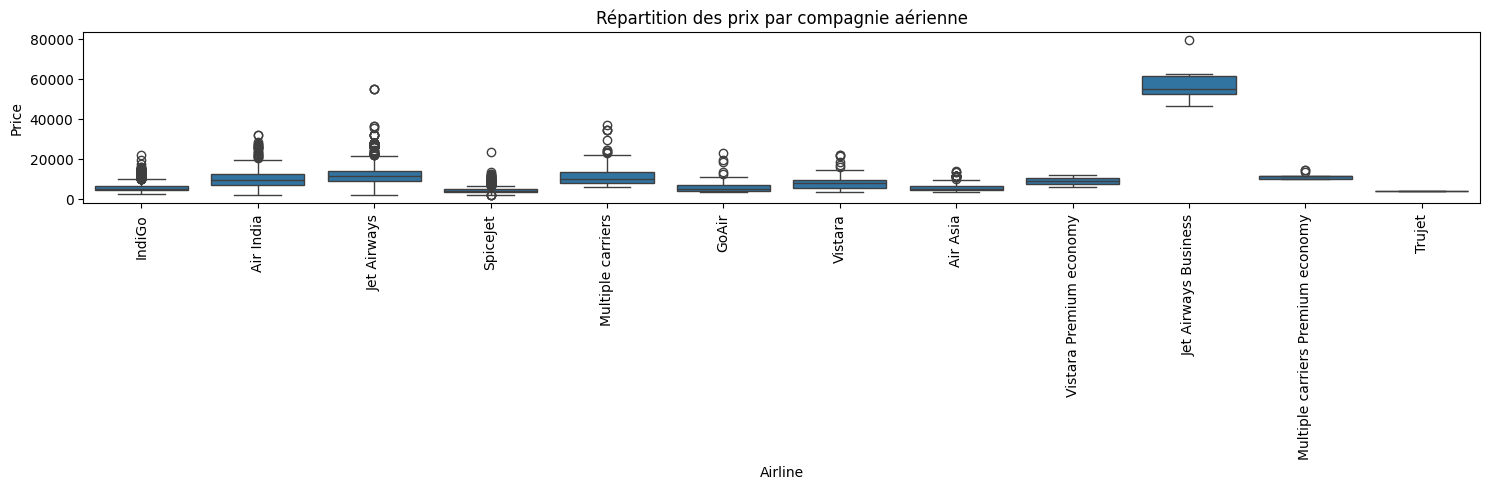

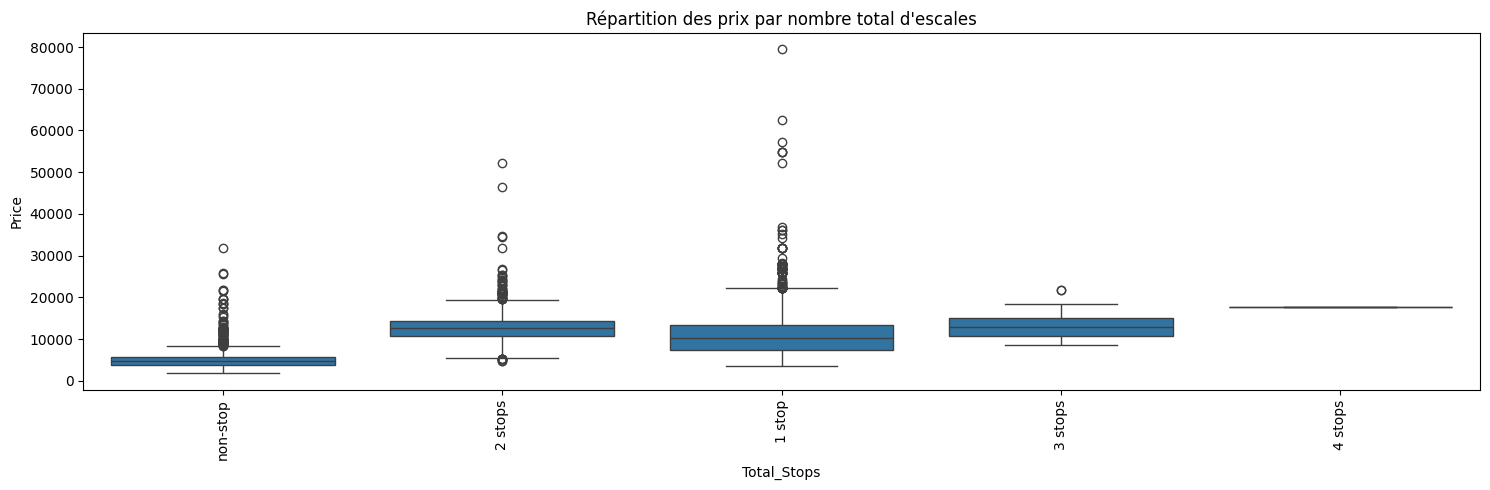

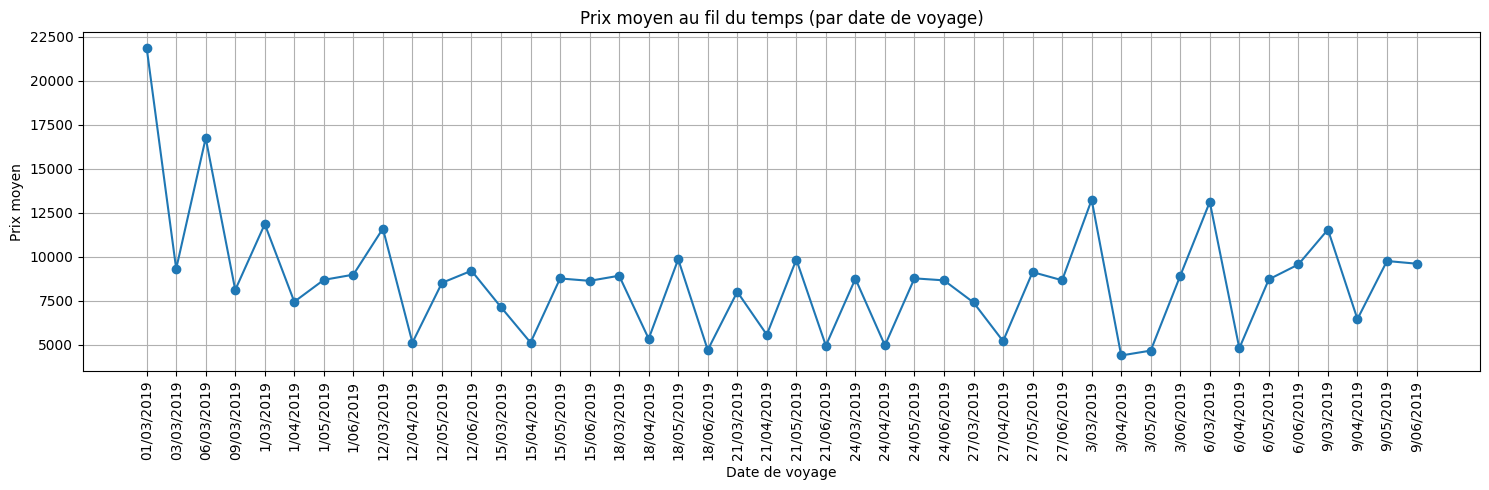

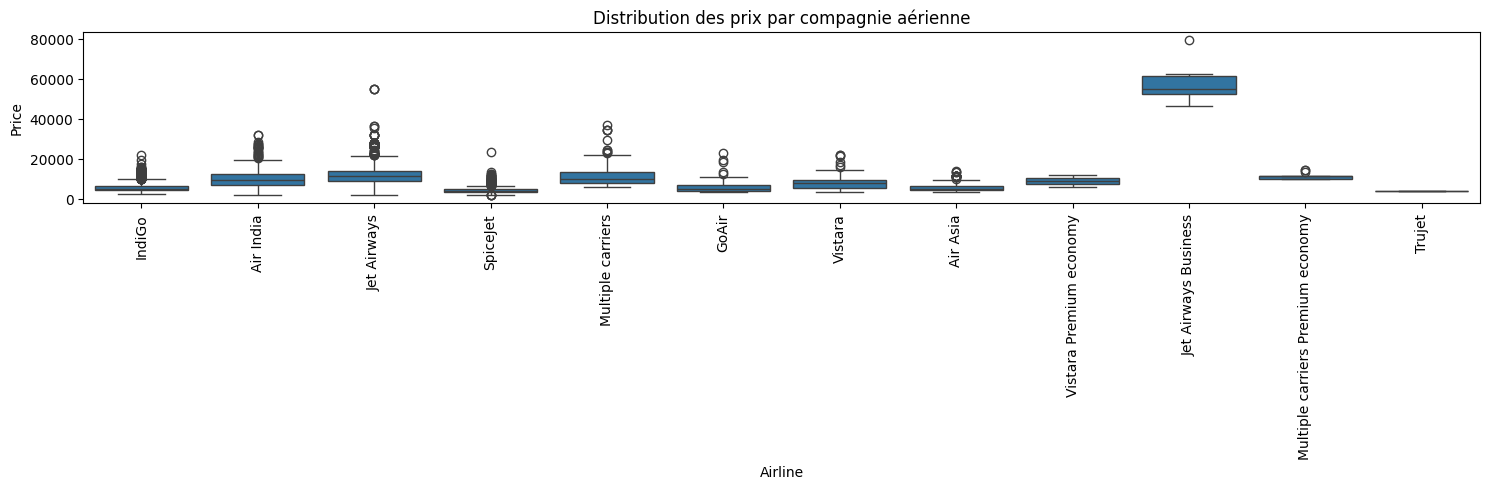

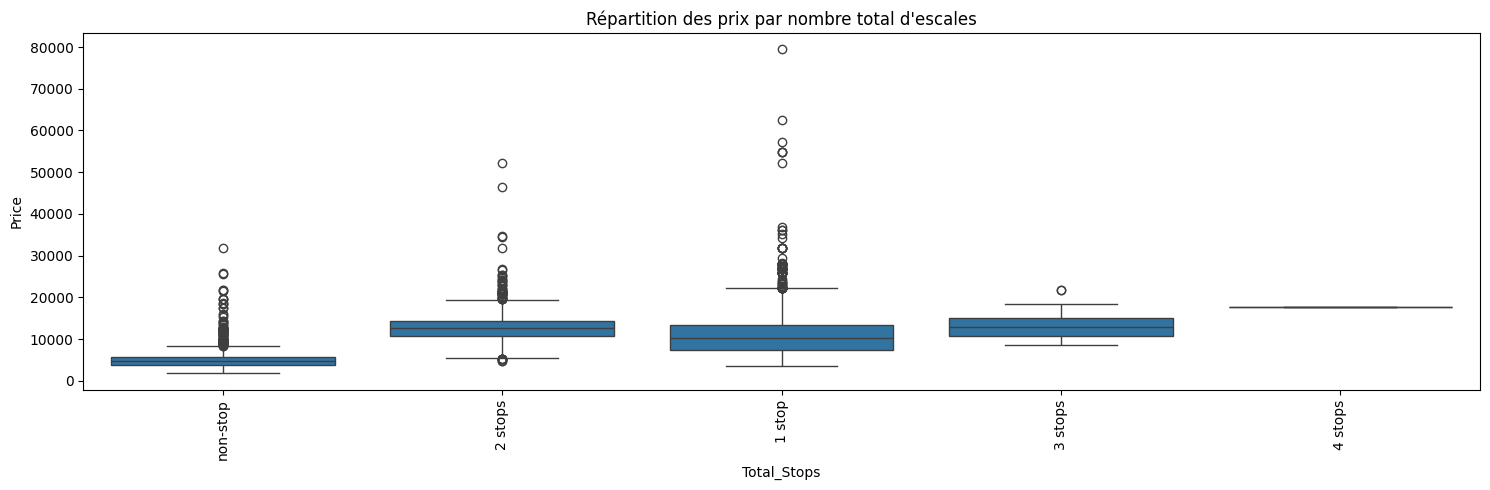

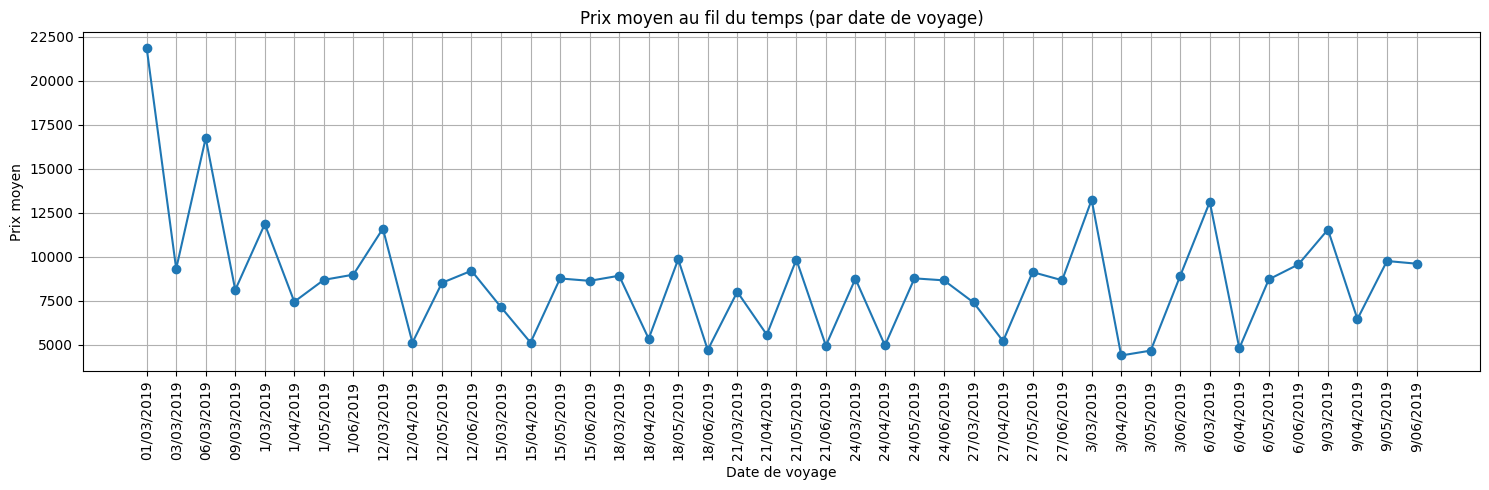

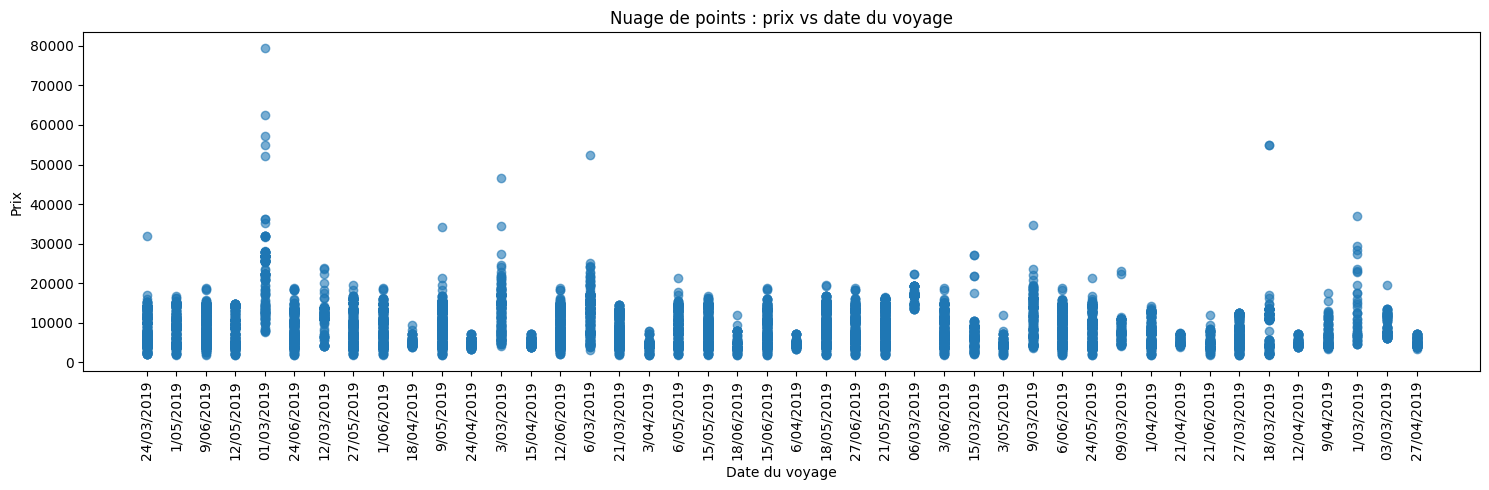

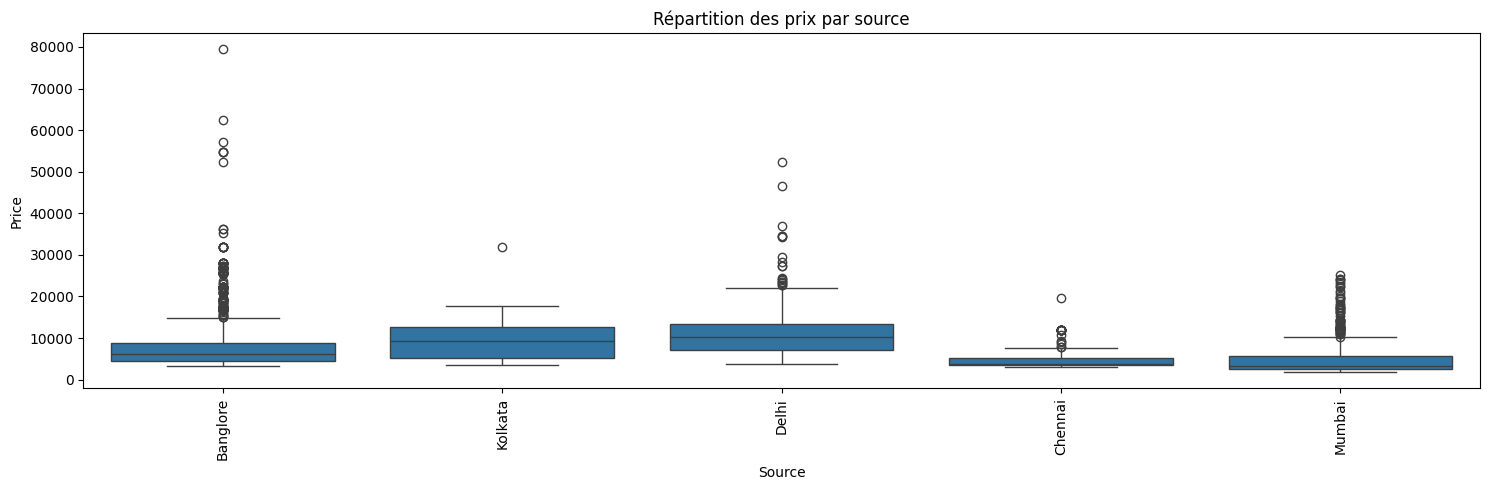

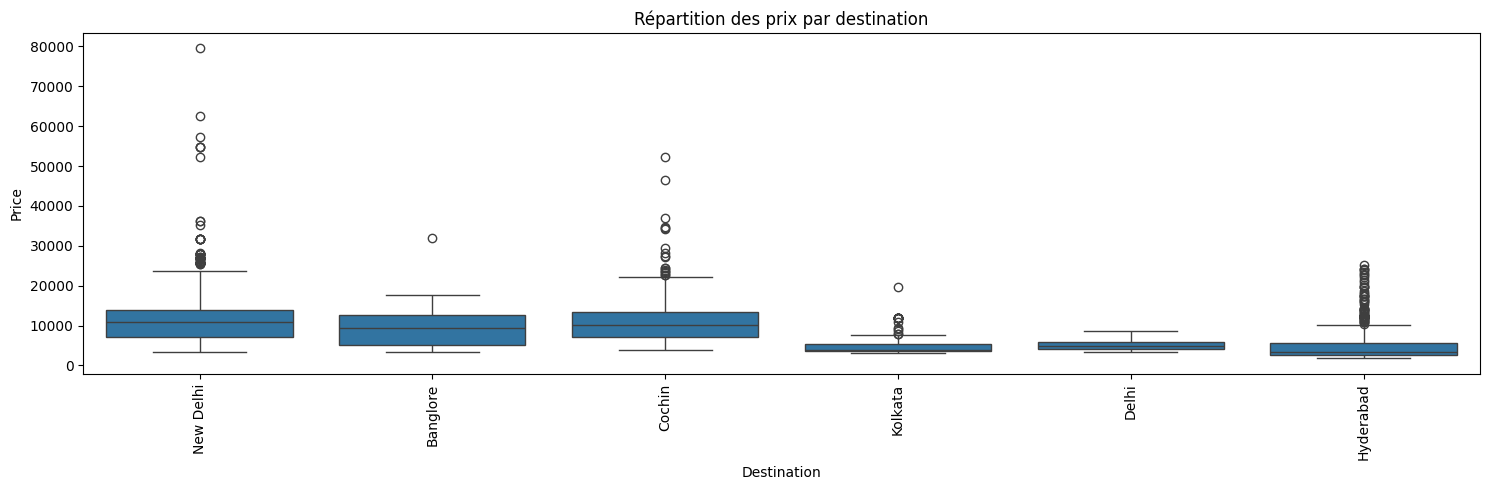

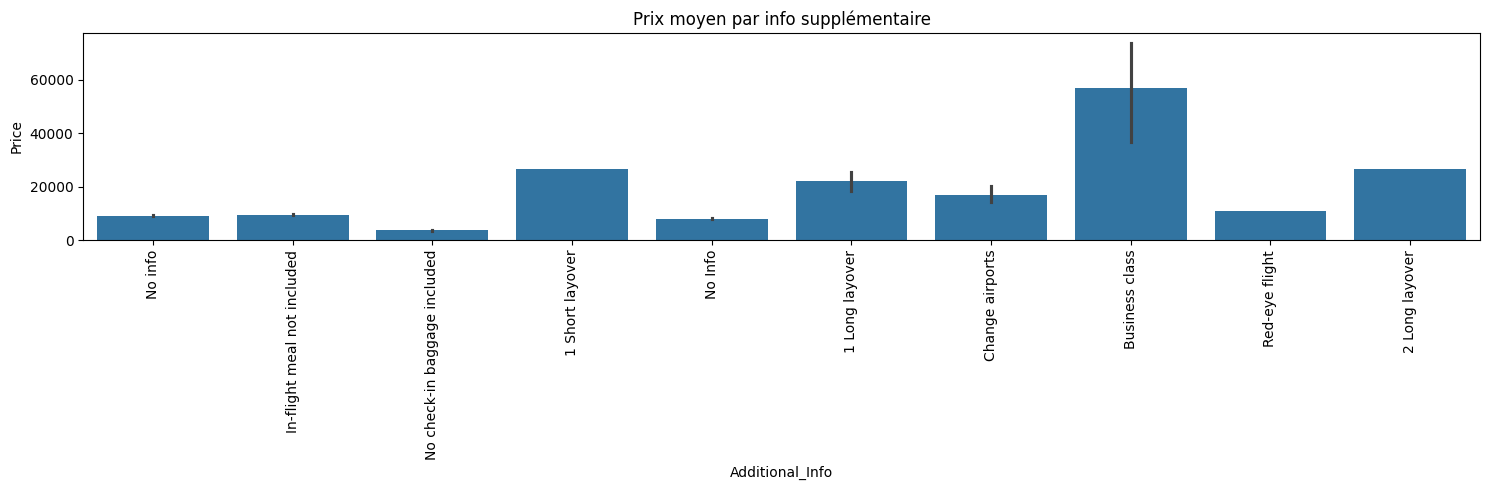

In [11]:
#Comprendre visuellement la variation des prix selon les différentes colonnes


# 1. Boîte à moustaches : prix par compagnie aérienne
plt.figure(figsize=[15, 5])
sns.boxplot(data=train, x='Airline', y='Price')
plt.xticks(rotation=90)
plt.title("Répartition des prix par compagnie aérienne")
plt.tight_layout()
plt.show()

# 2. Boîte à moustaches : prix par nombre total d'escales
plt.figure(figsize=[15, 5])
sns.boxplot(data=train, x='Total_Stops', y='Price')
plt.xticks(rotation=90)
plt.title("Répartition des prix par nombre total d\'escales")
plt.tight_layout()
plt.show()

# 3. Graphique linéaire : Moyenne du prix par Date_of_Journey
# On regroupe par date et on calcule la moyenne
daily_avg = train.groupby('Date_of_Journey')['Price'].mean()
sorted_dates = daily_avg.index.sort_values()

plt.figure(figsize=[15, 5])
plt.plot(sorted_dates, daily_avg.loc[sorted_dates], marker='o')
plt.xticks(rotation=90)
plt.title("Prix moyen au fil du temps (par date de voyage)")
plt.xlabel("Date de voyage")
plt.ylabel("Prix moyen")
plt.grid (True)
plt.tight_layout()
plt.show()

# Comprendre visuellement la variation des prix selon les différentes colonnes

# 1. Boîte à moustaches : prix par compagnie aérienne
plt.figure(figsize=[15, 5])
sns.boxplot(data=train, x='Airline', y='Price')
plt.xticks(rotation=90)
plt.title("Distribution des prix par compagnie aérienne")
plt.tight_layout()
plt.show()

# 2. Boîte à moustaches : prix par nombre total d'escales
plt.figure(figsize=[15, 5])
sns.boxplot(data=train, x='Total_Stops', y='Price')
plt.xticks(rotation=90)
plt.title("Répartition des prix par nombre total d'escales")
plt.tight_layout()
plt.show()

# 3. Graphique linéaire : Moyenne du prix par Date_of_Journey
daily_avg = train.groupby('Date_of_Journey')['Price'].mean()
sorted_dates = daily_avg.index.sort_values()

plt.figure(figsize=[15, 5])
plt.plot(sorted_dates, daily_avg.loc[sorted_dates], marker='o')
plt.xticks(rotation=90)
plt.title("Prix moyen au fil du temps (par date de voyage)")
plt.xlabel("Date de voyage")
plt.ylabel("Prix moyen")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Nuage de points : prix vs date du voyage
plt.figure(figsize=[15, 5])
plt.scatter(train["Date_of_Journey"], train["Price"], alpha=0.6)
plt.xticks(rotation=90)
plt.title("Nuage de points : prix vs date du voyage")
plt.xlabel("Date du voyage")
plt.ylabel("Prix")
plt.tight_layout()
plt.show()

# 5. Boîte à moustaches : prix par source
plt.figure(figsize=[15, 5])
sns.boxplot(data=train, x="Source", y="Price")
plt.xticks(rotation=90)
plt.title("Répartition des prix par source")
plt.tight_layout()
plt.show()

# 6. Boîte à moustaches : prix par destination
plt.figure(figsize=[15, 5])
sns.boxplot(data=train, x="Destination", y="Price")  # Correction : "Price", pas "Prix"
plt.xticks(rotation=90)
plt.title("Répartition des prix par destination")
plt.tight_layout()
plt.show()

# 7. Barplot : Moyenne du prix par Additional_Info
plt.figure(figsize=[15, 5])
sns.barplot(data=train, x="Additional_Info", y="Price")
plt.xticks(rotation=90)
plt.title("Prix moyen par info supplémentaire")
plt.tight_layout()
plt.show()

## Ingénierie des caractéristiques

In [12]:
train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute

train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute

/tmp/ipykernel_7383/87053142.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
/tmp/ipykernel_7383/87053142.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute
/tmp/ipykernel_7383/87053142.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
/tmp/ipykernel_7383/87053142.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back 

In [13]:
# Conversion de Dep_Time d'un objet (chaîne) au format heure
train.Dep_Time=pd.to_datetime(train.Dep_Time, format= "%H:%M").dt.time

In [14]:
# Manipulation de chaîne pour extraire uniquement les heures et les minutes de la colonne arrival_time et supprimer la partie date, puis 
# conversion de la chaîne au format heure comme indiqué ci-dessus
train.Arrival_Time=train.Arrival_Time.str.slice(0,6)
train.Arrival_Time=train.Arrival_Time.str.strip()
train.Arrival_Time=pd.to_datetime(train.Arrival_Time, format = '%H:%M').dt.time

In [15]:
# Conversion de la date du voyage au format date
train.Date_of_Journey=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.date

In [16]:
# Conversion d'une durée exprimée sous forme de chaîne de caractères en valeur entière en minutes
minute=train['Duration'].str.slice(3,).str.extract('(\d+)')
hour=train['Duration'].str.extract('(\d+)').astype('int')
minute=minute.fillna(0)#remplir minute= 0 lorsque la durée du vol n'était indiquée qu'en heures
train['Duration']=minute.astype('int')+hour*60

In [17]:
# Création d'une colonne « date d'arrivée » en ajoutant la date et l'heure du trajet avec la durée en minutes

train['Date_of_Arrival'] = pd.to_datetime(train['Date_of_Journey']) + pd.to_timedelta(train['Duration'], unit='m')
train['Date_of_Arrival'] = train['Date_of_Arrival'].dt.date

In [18]:
# Modification des otal Stops d'une valeur de chaîne à une valeur catégorielle 
train.Total_Stops.value_counts()  

Total_Stops
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: count, dtype: int64

In [19]:
dic={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops': 4}
train['Total_Stops']=train.Total_Stops.map(dic)
train.Total_Stops=train.Total_Stops.astype('category')

In [20]:
# Création d'une colonne de type catégoriel à partir de la colonne Airline 
r=train.Airline.str.split(' ',expand=True).get(2)
d={None:'Economy','Premium': 'Premium Economy','economy':'Premium Economy','Business':'Business' }
r=r.map(d)
train['Class']=r
train.Class=train.Class.astype('category')

In [21]:
# La colonne « Informations supplémentaires » contenait les valeurs « Aucune information » et « Aucune info ». Modification effectuée pour leur attribuer la même valeur de chaîne.
train.loc[train.Additional_Info=="No info",'Additional_Info']="No Info"

In [22]:
# Création d'une colonne entière same_day_travel qui indique si le vol est arrivé le jour même, un jour après le départ ou plus tard.
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y')
train['Date_of_Arrival'] = train['Date_of_Journey'] + pd.to_timedelta(train['Duration'], unit='m')

train['Same_day_travel'] = (train['Date_of_Arrival'].dt.date - train['Date_of_Journey'].dt.date).apply(lambda x: x.days)
train['Same_day_travel'] = train['Same_day_travel'].astype('category')

In [23]:
# Conversion de la compagnie aérienne en catégorie, car le prix varie selon les compagnies aériennes (la colonne Catégorie facilite la modélisation arborescente)
train.Airline=train.Airline.astype('category')

In [24]:
# Création de deux colonnes « jour de départ » et « jour d'arrivée » qui indiquent respectivement le jour de la semaine où le vol a décollé et celui où il est arrivé.
# L'idée est que le prix sera légèrement plus élevé le week-end et que cet indicateur permettra de le mettre en évidence
train['weekday_journey']=train['Date_of_Journey'].apply(lambda x: x.weekday())
train['weekday_arrival']=train['Date_of_Arrival'].apply(lambda x: x.weekday())

In [25]:
# Création de colonnes pour l'année, le mois et le jour du départ et de l'arrivée sous forme d'entiers afin de mieux 
# saisir toute saisonnalité liée à la date
train['Year']=pd.DatetimeIndex(train['Date_of_Journey']).year
train['month_of_journey']=pd.DatetimeIndex(train['Date_of_Journey']).month
train['month_of_Arrival']=pd.DatetimeIndex(train['Date_of_Arrival']).month
train['day_of_Arrival']=pd.DatetimeIndex(train['Date_of_Arrival']).day
train['day_of_journey']=pd.DatetimeIndex(train['Date_of_Journey']).day

Nouvelles fonctionnalités

In [26]:
Class = {'IndiGo': 'Economy',
         'GoAir': 'Economy',
         'Vistara': 'Economy',
         'Vistara Premium economy': 'Premium Economy',
         'Air Asia': 'Economy',
         'Trujet': 'Economy',
         'Jet Airways': 'Economy',
         'SpiceJet': 'Economy',
         'Jet Airways Business': 'Business',
         'Air India': 'Economy',
         'Multiple carriers': 'Economy',
         'Multiple carriers Premium economy': 'Premium Economy'}
train['Booking_Class'] = train['Airline'].map(Class)
test['Booking_Class'] = test['Airline'].map(Class)

In [27]:
market = {'IndiGo': 41.3,
         'GoAir': 8.4,
         'Vistara': 3.3,
         'Vistara Premium economy': 3.3,
         'Air Asia': 3.3,
         'Trujet': 0.1,
         'Jet Airways': 17.8,
         'SpiceJet': 13.3,
         'Jet Airways Business': 17.8,
         'Air India': 13.5,
         'Multiple carriers': 1,
         'Multiple carriers Premium economy': 1}
train['Market_Share'] = train['Airline'].map(market)
test['Market_Share'] = test['Airline'].map(market)

In [28]:
# Techniques que j'ai essayées mais qui n'ont pas aidé - Nombre de décollages et d'atterrissages par jour 
# - Nombre de décollages par ville et d'atterrissages par ville par jour
r=train.groupby(['Date_of_Journey']).Date_of_Journey.apply(lambda x: x.count())
train['Number_take-offs']=train.Date_of_Journey.map(r)
r=train.groupby(['Date_of_Arrival']).Date_of_Arrival.apply(lambda x: x.count())
train['Number_landings']=train.Date_of_Arrival.map(r)

In [29]:
r=train.groupby(['Date_of_Journey','Source'])['Source'].count().reset_index(name='Number_takeoff_source')
train=train.merge(r,how="left", on=["Date_of_Journey","Source"])
r=train.groupby(['Date_of_Arrival','Source'])['Source'].count().reset_index(name='Number_landing_Destination')
train=train.merge(r,how="left", on=["Date_of_Arrival","Source"])

In [30]:
train[(train.Date_of_Arrival==datetime.date(2019,3,1))][['Source','Number_landing_Destination']]

,Source,Number_landing_Destination


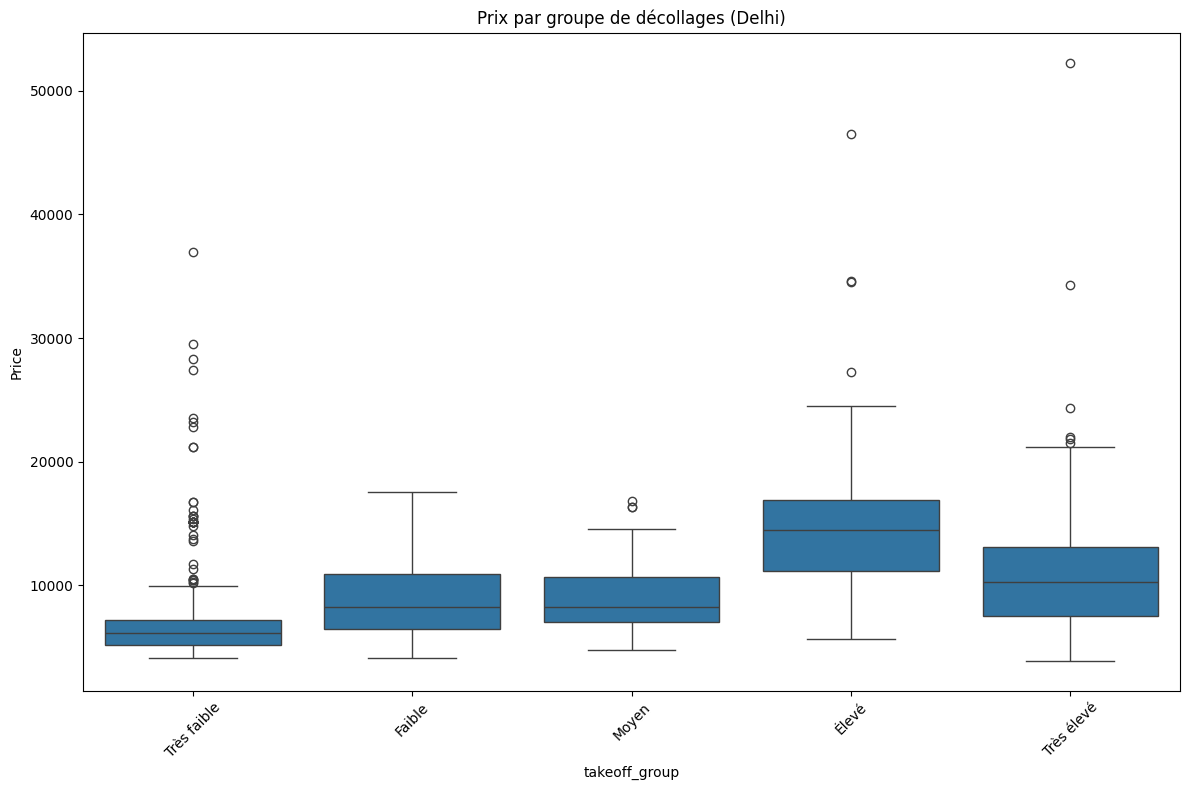

In [31]:
df_delhi = train[train.Source == 'Delhi'].copy()
df_delhi['takeoff_group'] = pd.cut(df_delhi['Number_takeoff_source'], bins=5, labels=['Très faible', 'Faible', 'Moyen', 'Élevé', 'Très élevé'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_delhi, x='takeoff_group', y='Price')
plt.xticks(rotation=45)
plt.title("Prix par groupe de décollages (Delhi)")
plt.tight_layout()
plt.show()

## Redimensionnement des données (normalisation)

/tmp/ipykernel_7383/1005573417.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[:len_train].Price, fit=stats.norm)


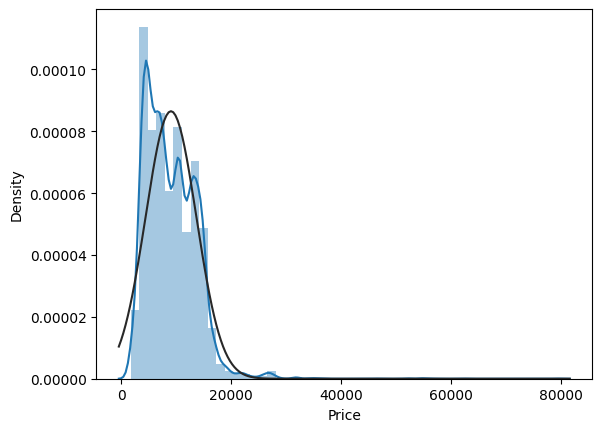

((array([-3.82690953, -3.60266143, -3.4795895 , ...,  3.4795895 ,
          3.60266143,  3.82690953]),
  array([ 1759.,  1759.,  1759., ..., 57209., 62427., 79512.])),
 (4364.062692425855, 9087.064120565383, 0.9460976378917301))

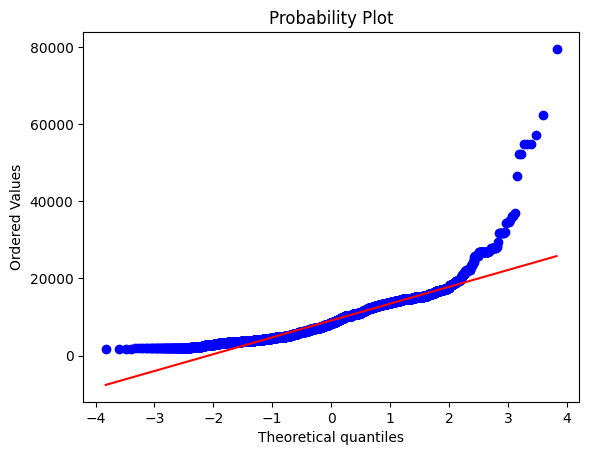

In [32]:
sns.distplot(train[:len_train].Price, fit=stats.norm)
l=plt.show()
stats.probplot(train[:len_train].Price,plot=plt )

/tmp/ipykernel_7383/3882401642.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xt, fit=stats.norm)


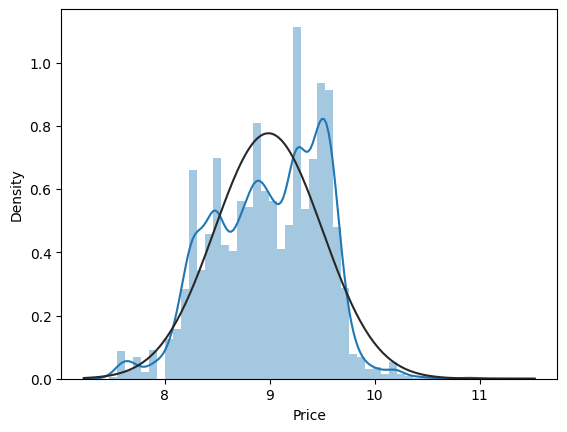

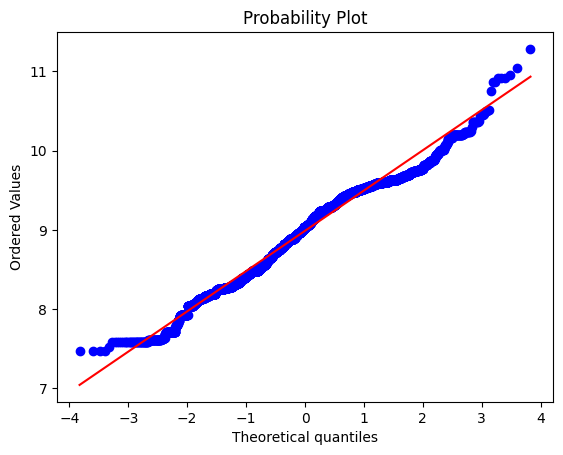

In [33]:
xt=np.log(train[:len_train].Price)
sns.distplot(xt, fit=stats.norm)
l=plt.show()
stats.probplot(xt,plot=plt )

train.Price=np.log(train.Price)

## Gestion des valeurs nulles

In [34]:
##Identification des colonnes comportant des valeurs manquantes
train.isnull().sum()

Airline                          0
Date_of_Journey                  0
Source                           0
Destination                      0
Route                            1
Dep_Time                         0
Arrival_Time                     0
Duration                         0
Total_Stops                      1
Additional_Info                  0
Price                         2671
Depart_Time_Hour                 0
Depart_Time_Minutes              0
Arr_Time_Hour                    0
Arr_Time_Minutes                 0
Date_of_Arrival                  0
Class                            0
Same_day_travel                  0
weekday_journey                  0
weekday_arrival                  0
Year                             0
month_of_journey                 0
month_of_Arrival                 0
day_of_Arrival                   0
day_of_journey                   0
Booking_Class                    0
Market_Share                     0
Number_take-offs                 0
Number_landings     

In [35]:
# Filtrer les données comportant des valeurs manquantes et les compléter avec les valeurs appropriées déterminées.
train.loc[(train.Source=='Delhi') & (train.Destination=='Cochin') & (pd.DatetimeIndex(train['Date_of_Journey']).month==5)& (train.Duration==1420) &(train.Airline=='Air India') ].sort_values(['Date_of_Journey'])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,month_of_journey,month_of_Arrival,day_of_Arrival,day_of_journey,Booking_Class,Market_Share,Number_take-offs,Number_landings,Number_takeoff_source,Number_landing_Destination
9039,Air India,2019-05-06,Delhi,Cochin,NaN,09:45:00,09:25:00,1420,NaN,No Info,...,5,5,6,6,Economy,13.5,355,1,32,1
10348,Air India,2019-05-09,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,...,5,5,9,9,Economy,13.5,628,2,304,2
12318,Air India,2019-05-09,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,...,5,5,9,9,Economy,13.5,628,2,304,2
2343,Air India,2019-05-15,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,...,5,5,15,15,Economy,13.5,511,2,192,2
2554,Air India,2019-05-15,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,...,5,5,15,15,Economy,13.5,511,2,192,2
3595,Air India,2019-05-18,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,...,5,5,18,18,Economy,13.5,633,2,310,2
9717,Air India,2019-05-18,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,...,5,5,18,18,Economy,13.5,633,2,310,2
8135,Air India,2019-05-21,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,...,5,5,21,21,Economy,13.5,615,1,300,1
1616,Air India,2019-05-24,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,...,5,5,24,24,Economy,13.5,357,1,33,1


In [36]:
train.Route=train.Route.fillna('DEL → MAA → COK')
train.loc[train.Total_Stops.isnull(),'Total_Stops']=1

## Suppression des valeurs aberrantes

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Airline                     13354 non-null  category      
 1   Date_of_Journey             13354 non-null  datetime64[ns]
 2   Source                      13354 non-null  object        
 3   Destination                 13354 non-null  object        
 4   Route                       13354 non-null  object        
 5   Dep_Time                    13354 non-null  object        
 6   Arrival_Time                13354 non-null  object        
 7   Duration                    13354 non-null  int64         
 8   Total_Stops                 13354 non-null  category      
 9   Additional_Info             13354 non-null  object        
 10  Price                       10683 non-null  float64       
 11  Depart_Time_Hour            13354 non-null  int32     

/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.180e+02, tolerance: 2.818e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


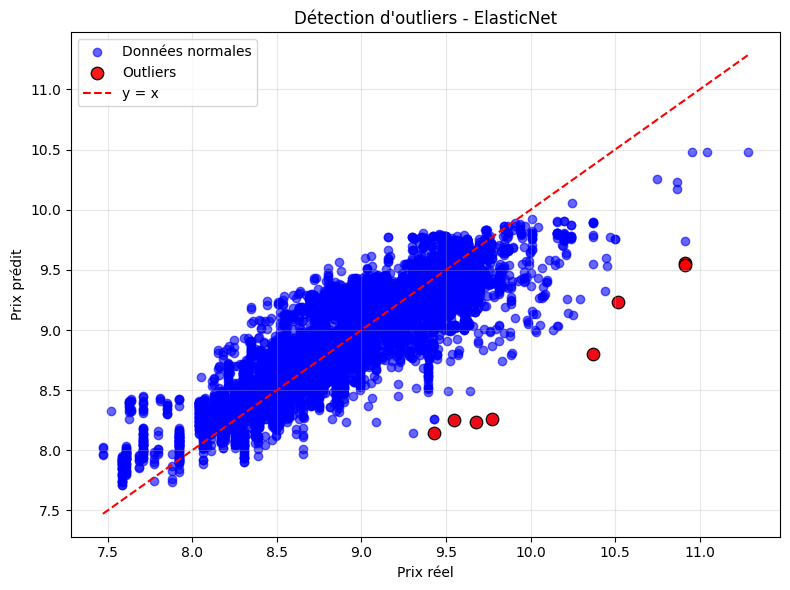

Nombre d'outliers détectés : 8
Indices : [  396  1478  2618  4284  5388  8034  8525 10052]


In [38]:
# --- Détection des valeurs aberrantes avec ElasticNet ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

# 1. Supprimer les colonnes inutiles ou non exploitables
cols_to_drop = ['Date_of_Journey', 'Date_of_Arrival', 'Route', 'Dep_Time', 'Arrival_Time']
X = train[:len_train].drop(columns=cols_to_drop + ['Price'], errors='ignore')
y = train[:len_train]['Price']

# 2. Convertir toutes les colonnes 'object' en 'category' pour un encodage propre
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category')

# 3. One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True, dtype=int)

# 4. Forcer le type numérique (très important)
X_encoded = X_encoded.astype('float64')  # ou 'int64'

# 5. Vérifier que tout est numérique
assert all(dtype in ['int64', 'float64'] for dtype in X_encoded.dtypes), "Données non numériques présentes"

# 6. Entraîner ElasticNet
enet = ElasticNet(max_iter=1000, alpha=0.001, l1_ratio=0)
enet.fit(X_encoded, y)

# 7. Prédictions et résidus
y_pred = enet.predict(X_encoded)
resid = y - y_pred
z_scores = (resid - resid.mean()) / resid.std()

# 8. Détection des outliers (|z| > 5)
outlier_indices = np.where(np.abs(z_scores) > 5)[0]

# 9. Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, label="Données normales", color="blue")
if len(outlier_indices) > 0:
    plt.scatter(y.iloc[outlier_indices], y_pred[outlier_indices], 
                color='red', label="Outliers", s=80, edgecolor='k', alpha=0.9)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="y = x")
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Détection d'outliers - ElasticNet")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 10. Résultat
print(f"Nombre d'outliers détectés : {len(outlier_indices)}")
if len(outlier_indices) > 0:
    print(f"Indices : {outlier_indices}")
else:
    print("Aucun outlier détecté avec |z| > 5")

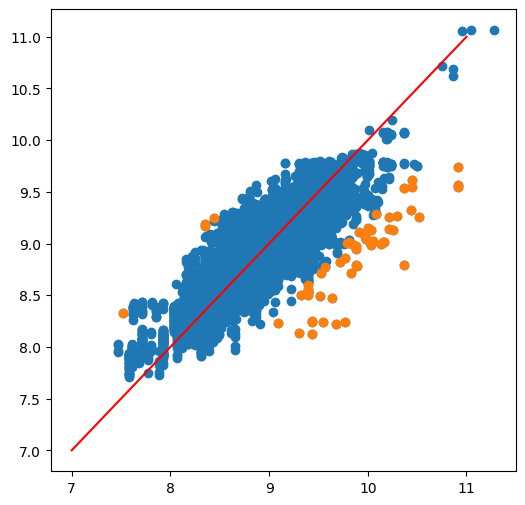

In [39]:
ridge=Ridge(alpha=1)

ridge.fit(X_encoded,y)
y_pred=ridge.predict(X_encoded)
resid=y-y_pred
z=(resid-resid.mean())/resid.std()
z=np.array(z)
outlier2=np.where(abs(z)>abs(z).std()*5)[0]
len(outlier2)

plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y.iloc[outlier2], y_pred[outlier2])
plt.plot(range(7, 12), range(7, 12), color="red")

In [40]:
outlier_final=[]
for i in outlier_indices:
    for j in outlier2:
        if i==j:
            outlier_final.append(i)
(outlier_final)

[396, 1478, 2618, 4284, 5388, 8034, 8525, 10052]

In [41]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,month_of_journey,month_of_Arrival,day_of_Arrival,day_of_journey,Booking_Class,Market_Share,Number_take-offs,Number_landings,Number_takeoff_source,Number_landing_Destination
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0.0,No Info,...,3,3,24,24,Economy,41.3,401,40,123,39
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2.0,No Info,...,5,5,1,1,Economy,13.5,339,1,226,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2.0,No Info,...,6,6,9,9,Economy,17.8,614,1,291,1
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1.0,No Info,...,5,5,12,12,Economy,41.3,327,1,222,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1.0,No Info,...,3,3,1,1,Economy,41.3,245,2,186,2


## Transformation des données (transformation de Boxcox)

In [42]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in train.columns:
    if i!='Price':
        if train[i].dtype in numeric_dtypes: 
            numerics2.append(i)

skew_features = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
print(skews)

high_skew = skew_features[abs(skew_features) > 0.3]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
     if i!='Price':
        train[i]= boxcox1p(train[i], boxcox_normmax(train[i]+1))

        
skew_features2 = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
skews2


                                skew
Number_landing_Destination  2.313919
Number_landings             2.141975
Duration                    0.867995
Market_Share                0.763612
Depart_Time_Minutes         0.159379
day_of_journey              0.135127
day_of_Arrival              0.134328
Arr_Time_Minutes            0.111698
Depart_Time_Hour            0.109075
weekday_journey             0.040376
weekday_arrival             0.039653
Number_takeoff_source      -0.348689
Arr_Time_Hour              -0.384548
month_of_journey           -0.390640
month_of_Arrival           -0.390640
Number_take-offs           -0.501536
Year                             NaN


/tmp/ipykernel_7383/3892632644.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_features = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
/tmp/ipykernel_7383/3892632644.py:21: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_features2 = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)


,skew
Number_landing_Destination,0.261086
Number_landings,0.176487
Depart_Time_Minutes,0.159379
day_of_journey,0.135127
day_of_Arrival,0.134328
Arr_Time_Minutes,0.111698
Depart_Time_Hour,0.109075
Duration,0.054899
weekday_journey,0.040376
weekday_arrival,0.039653


## Préparation des données pour la modélisation

In [43]:
# Création d'une matrice creuse à l'aide de la fonction pandas get dummies qui permet de diviser les colonnes de chaînes de caractères en valeurs booléennes.
df=pd.get_dummies(train)
# Division des données de test et d'entraînement
train_df=df[:len_train]
test_df=df[len_train:]

In [44]:
# Suppression du prix des données variables indépendantes et conservation uniquement du prix dans l'autre
x=train_df.drop("Price",axis=1)
y=train_df["Price"]

In [45]:
# Suppression du prix des données variables indépendantes et conservation uniquement du prix dans l'autre
xx=test_df.drop("Price",axis=1)
yy=test_df["Price"]

In [46]:
# --- Fonction d'évaluation avec validation croisée ---
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# 1. Supprimer les colonnes datetime et inutiles
cols_to_drop = ['Date_of_Journey', 'Date_of_Arrival', 'Route', 'Dep_Time', 'Arrival_Time']
X_clean = train.drop(columns=cols_to_drop + ['Price'], errors='ignore')

# 2. Convertir les colonnes 'object' en 'category' ou les encoder
for col in X_clean.columns:
    if X_clean[col].dtype == 'object':
        X_clean[col] = X_clean[col].astype('category')

# 3. One-hot encoding (si nécessaire)
X_encoded = pd.get_dummies(X_clean, drop_first=True, dtype=int)

# 4. Target
y = train['Price'].dropna()  # seulement les lignes avec Price non NaN

# 5. S'assurer que X_encoded et y ont la même taille
X_final = X_encoded[:len(y)]  # aligner avec len_train

In [47]:
# Écriture d'une fonction pour évaluer les performances du modèle à l'aide de KFOLD et de la validation croisée
def rmsle_cv(model, X=X_final, y=y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=10)  # n_splits=5 est plus standard que 2
    rmse = np.sqrt(-cross_val_score(model, X, y, cv=kfold, scoring="neg_mean_squared_error"))
    return rmse


In [48]:
lightgbm = LGBMRegressor(
    objective='regression',
    num_leaves=80,
    learning_rate=0.1,
    n_estimators=1200,
    max_bin=30,
    bagging_fraction=0.8,
    bagging_freq=9,
    feature_fraction=0.129,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf=3,
    min_sum_hessian_in_leaf=6,
    random_state=10
)



In [49]:

score = rmsle_cv(lightgbm)
print(f"RMSLE: {score.mean():.4f} ± {score.std():.4f}")

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.129
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.129
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM]

In [50]:
xgb=XGBRegressor(learning_rate =0.1, 
      n_estimators=1500, max_depth=12, min_child_weight=1,gamma=0, reg_alpha=2e-5,
      subsample=0.8,colsample_bytree=0.8,
      nthread=4,scale_pos_weight=1,seed=27,verbose=True,random_state=10)

In [51]:

score = rmsle_cv(xgb)
print(f"RMSLE: {score.mean():.4f} ± {score.std():.4f}")

/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:14:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:14:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:15:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:15:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packag

RMSLE: 0.1252 ± 0.0066


In [52]:
grb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=400, max_depth=12
                              ,subsample=0.8,
                              verbose=False,random_state=10)

In [53]:

score = rmsle_cv(grb)
print(f"RMSLE: {score.mean():.4f} ± {score.std():.4f}")

RMSLE: 0.1275 ± 0.0052


In [54]:
#svr = Pipeline([('Scaler',RobustScaler()), ('SVR',SVR(C= 10000, epsilon= 0.008, gamma=0.009))])

In [55]:

#score = rmsle_cv(svr)
#print(f"RMSLE: {score.mean():.4f} ± {score.std():.4f}") # Commented for faster running of complete code

In [56]:
#krr=KernelRidge(alpha=1, kernel='polynomial', gamma=0.001,degree=3,coef0=5)
#score = rmsle_cv(krr)
#print(f"RMSLE: {score.mean():.4f} ± {score.std():.4f}")

In [57]:
rf=RandomForestRegressor(n_estimators=100, oob_score = False, n_jobs = -1,random_state =50,
                         max_features = "sqrt", min_samples_leaf = 2,warm_start=True,criterion='squared_error',max_depth=50)

In [58]:
score = rmsle_cv(rf)
print(f"RMSLE: {score.mean():.4f} ± {score.std():.4f}")# Commented for faster running of complete code

RMSLE: 0.1449 ± 0.0054


In [59]:
# Ensemble final qui utilise les résultats de chaque modèle régresseur et les données originales dans le méta-régresseur XGB
avg=StackingCVRegressor(regressors=(lightgbm,grb,rf),meta_regressor=xgb, use_features_in_secondary=True)


In [60]:
# Function to calculate RMSE error of the complete model for reference, similiar to rmsle_cv without KFOLD CV
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [61]:
# Ajustement du modèle aux données relatives aux trains et prévision des valeurs des prix des trains
%time avg.fit(X_final, y)
%time y_pred = avg.predict(X_final)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.129
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.129
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM]

/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:17:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.129
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
CPU times: user 4min 43s, sys: 1.25 s, total: 4min 44s
Wall time: 1min 34s


/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


CPU times: user 2.19 s, sys: 10.3 ms, total: 2.2 s
Wall time: 404 ms


In [62]:
# RMSE value of the model on training data
rmsle(y,y_pred)

0.06003579257770546

## Applying Xgboost Model

In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from datetime import datetime
from sklearn.metrics import mean_squared_error

In [65]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [66]:
xgb = XGBRegressor(
    learning_rate=0.02,
    n_estimators=2000,
    verbosity=1,        # 0=silencieux, 1=progression
    n_jobs=-1,          # utilise tous les cœurs CPU
    random_state=42     # reproductibilité
)

In [67]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [68]:
folds = 3
param_comb = 2

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring=mean_squared_error, n_jobs=4, cv=3, verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_final, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/inspect.py", line 3112, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/home/lamethode/anaconda3/envs/ai_se

[CV 1/3] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0;, score=nan total time=   0.7s
[CV 2/3] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0;, score=nan total time=   0.7s
[CV 3/3] END colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0;, score=nan total time=   0.8s
[CV 1/3] END colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6;, score=nan total time=   0.9s


/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/home/lamethode/anaconda3/envs/ai_service/lib/python3.10/inspect.py", line 3112, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/home/lamethode/anaconda3/envs/ai_se

[CV 2/3] END colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6;, score=nan total time=   0.5s
[CV 3/3] END colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6;, score=nan total time=   0.5s

 Time taken: 0 hours 0 minutes and 2.69 seconds.


In [69]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([0.73420143, 0.59317597]), 'std_fit_time': array([0.02471004, 0.19022619]), 'mean_score_time': array([0.00204285, 0.0004553 ]), 'std_score_time': array([0.00133369, 0.00028632]), 'param_subsample': masked_array(data=[1.0, 0.6],
             mask=[False, False],
       fill_value=1e+20), 'param_min_child_weight': masked_array(data=[5, 10],
             mask=[False, False],
       fill_value=999999), 'param_max_depth': masked_array(data=[4, 4],
             mask=[False, False],
       fill_value=999999), 'param_gamma': masked_array(data=[2, 5],
             mask=[False, False],
       fill_value=999999), 'param_colsample_bytree': masked_array(data=[1.0, 1.0],
             mask=[False, False],
       fill_value=1e+20), 'params': [{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 2, 'colsample_bytree': 1.0}, {'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 1.0}], 'split0_test_score': array([na

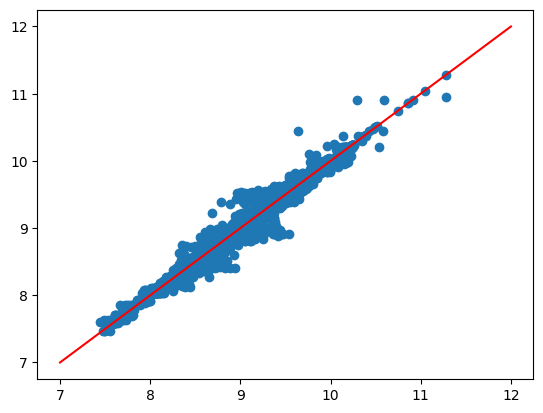

In [70]:
# Plot of the model prediction with the original price values in the training data set to undestand model fit
plt.scatter(list(y_pred),y)
plt.plot(range(7,13),range(7,13),'r')

In [71]:
# RMSE value of the model on training data
rmsle(y,y_pred)

0.06003579257770546

## Save the Model 

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('flight_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(xgb, file)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from datetime import datetime
import pickle
import numpy as np

# Paramètres à tester
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# Modèle de base
xgb = XGBRegressor(
    learning_rate=0.02,
    n_estimators=2000,
    verbosity=1,
    n_jobs=-1,
    random_state=42
)

# Recherche aléatoire
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,
    n_iter=10,  # Augmente si tu veux plus de combinaisons
    scoring='neg_mean_squared_error',  # ⚠️ Pas mean_squared_error ! C’est négatif dans scikit-learn
    cv=3,
    verbose=3,
    n_jobs=4,
    random_state=1001
)

# Entraînement
print("Début de l'entraînement...")
start_time = datetime.now()
random_search.fit(x, y)
print("Entraînement terminé.")

# Affichage des résultats
print('\nBest estimator:', random_search.best_estimator_)
print('\nBest score (RMSE-like):', np.sqrt(-random_search.best_score_))  # RMSE
print('\nBest params:', random_search.best_params_)

# ✅ Sauvegarde du modèle entraîné
with open('flight_xgb.pkl', 'wb') as file:
    pickle.dump(random_search.best_estimator_, file)

print("✅ Modèle sauvegardé dans flight_xgb.pkl")

Début de l'entraînement...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=-0.052 total time=   0.7s
[CV 2/3] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=-0.051 total time=   0.7s
[CV 3/3] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=-0.054 total time=   0.7s
[CV 1/3] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=-0.038 total time=   1.0s
[CV 3/3] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=-0.038 total time=   0.7s
[CV 2/3] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=-0.038 total time=   0.9s
[CV 1/3] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8;, score=-0.033 total time=   0.8s
[CV 2/3] END colsample_bytree=0